# MINOR PROJECT

**Problem Statement** : To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above) and analyse the dataset

In [1]:
import pandas as pd

#Loading the Data Set
games=pd.read_csv('appstore_games (2).csv')
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


### Data Cleaning

* Games without User Rating are dropped.
* Unwanted Columns are dropped such as
     1. URL
     2. ID
     3. Subtitle
     4. Icon URL
     5. Description
     6. Developer
     7. Languages
     8. Primary Genre

In [2]:
games = games.dropna(axis=0, subset=['Average User Rating'])
games = games.drop(labels='URL',axis=1)
games = games.drop(labels='ID',axis=1)
games = games.drop(labels='Subtitle',axis=1)
games = games.drop(labels='Icon URL',axis=1)
games = games.drop(labels='Description',axis=1)
games = games.drop(labels='Developer',axis=1)
games = games.drop(labels='Languages',axis=1)
games = games.drop(labels='Primary Genre',axis=1)
games.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,4+,15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,4+,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,4+,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


* Convert the Date strings to datetime objects
* Games with less than 200 user rating AND days since last update date i.e; less than 6 months are dropped to prevent biased ratings 

In [3]:
import datetime

games['Original Release Date'] = pd.to_datetime(games['Original Release Date'])
games['Current Version Release Date'] = pd.to_datetime(games['Current Version Release Date'])

#Created new column for time gap between release & update dates
games['Update_Gap']=games['Current Version Release Date']-games['Original Release Date']

#Dropped games that has user ratings less than 200 and Release Date - Update date less than 6 months
Low_User_Count=(games[games['User Rating Count'] < 200].index) &\
games[games.Update_Gap < datetime.timedelta(days=175)].index

games.drop(Low_User_Count , inplace=True)
games.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date,Update_Gap
0,Sudoku,4.0,3553.0,2.99,NaN,4+,15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,Reversi,3.5,284.0,1.99,NaN,4+,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,Morocco,3.0,8376.0,0.00,NaN,4+,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3656 days


* Genre tags 'Games' and 'Strategy' are removed from the Genre string as they are not useful for the analysis

* The remaining of the string are checked and grouped as follows:
     1. Puzzle  -  Puzzle/Board
     2. Adventure  -  Adventure/Role/Role Playing
     3. Action  -  Action
     4. Family  -  Family/Education
     5. Entertainment  -  Entertainment

In [4]:
game = games.copy()
game['Genres'] = game['Genres'].str.replace(',', '').str.replace('Games', '').str.replace('Strategy', '') 
game['Genres'] = game['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
game['Genres']=game['Genres'].str.strip()
Non_Main_Genres=game[~game.Genres.str.contains('Puzzle') & \
                           ~game.Genres.str.contains('Action') & \
                           ~game.Genres.str.contains('Family')& \
                           ~game.Genres.str.contains('Education')& \
                           ~game.Genres.str.contains('Family')& \
                           ~game.Genres.str.contains('Adventure')&\
                           ~game.Genres.str.contains('Board')&\
                           ~game.Genres.str.contains('Role')&\
                           ~game.Genres.str.contains('Entertainment')].index
game.drop(Non_Main_Genres , inplace=True)
game.loc[game['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
game.loc[game['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
game.loc[game['Genres'].str.contains('Action'),'Genres'] = 'Action'
game.loc[game['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
game.loc[game['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
game.loc[game['Genres'].str.contains('Family'),'Genres'] = 'Family'
game.loc[game['Genres'].str.contains('Entertainment'),'Genres'] = 'Entertainment'
game.loc[game['Genres'].str.contains('Education'),'Genres'] = 'Family'

game.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Size,Genres,Original Release Date,Current Version Release Date,Update_Gap
0,Sudoku,4.0,3553.0,2.99,NaN,4+,15853568.0,Puzzle,2008-11-07,2017-05-30,3126 days
1,Reversi,3.5,284.0,1.99,NaN,4+,12328960.0,Puzzle,2008-11-07,2018-05-17,3478 days
2,Morocco,3.0,8376.0,0.00,NaN,4+,674816.0,Puzzle,2008-11-07,2017-05-09,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,21552128.0,Puzzle,2008-07-23,2017-05-30,3233 days
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,34689024.0,Puzzle,2008-07-18,2018-07-22,3656 days


## Exploratory Data Analysis

### Data Visualization
* Visualizing the Genres' Strings usings Graphs

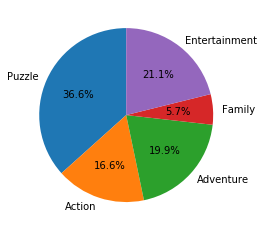

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


#Pie Chart
NG = [game.Genres[(game['Genres']=='Puzzle')].count(),game.Genres[(game['Genres']=='Action')].count(),\
     game.Genres[(game['Genres']=='Adventure')].count(),game.Genres[(game['Genres']=='Family')].count(),\
     game.Genres[(game['Genres']=='Entertainment')].count()]
G = ['Puzzle','Action','Adventure','Family','Entertainment']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

### Data Analysis on Genre distribution

 Identifinig the Genres that have higher user ratings i.e; Greater than 3.5 .
 

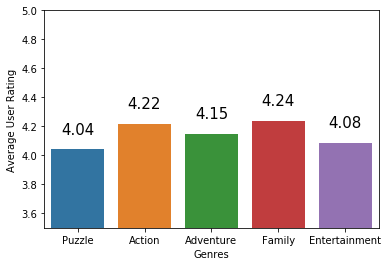

In [6]:
game.rename(columns = {'Average User Rating':'Average_User_Rating','In-app Purchases':'In_App_Purchase'}, inplace = True)
x=['Puzzle','Action','Adventure','Family','Entertainment']
y = [game.Average_User_Rating[(game['Genres']=='Puzzle')].mean(),\
     game.Average_User_Rating[(game['Genres']=='Action')].mean(),\
     game.Average_User_Rating[(game['Genres']=='Adventure')].mean(),\
     game.Average_User_Rating[(game['Genres']=='Family')].mean(),\
     game.Average_User_Rating[(game['Genres']=='Entertainment')].mean()]

vis2= sns.barplot(x,y)
vis2.set(xlabel='Genres',ylabel='Average User Rating')
vis2.set(ylim=(3.5,5))
for p in vis2.patches:
             vis2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.ioff()

**The highest and lowest rated genre**
* Puzzle is the lowest rated game
* Family is the highest rated game

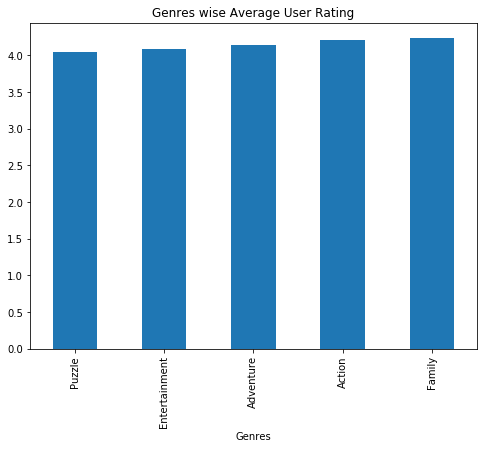

In [7]:
top_genres = list(game["Genres"].value_counts().head(10).index)
game[game["Genres"].isin(top_genres)].groupby("Genres")["Average_User_Rating"].agg("mean").sort_values().plot.bar(figsize=(8,6))
plt.title("Genres wise Average User Rating")
plt.show()

**Age ratings that has highest and least proportion of apps?**


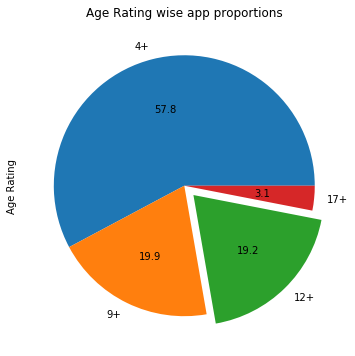

In [8]:
game["Age Rating"].value_counts().plot.pie(autopct="%1.1f", explode=[0,0,0.1,0], figsize=(6,6))
plt.title("Age Rating wise app proportions")
plt.show()

**Average size of apps in each Genre String**

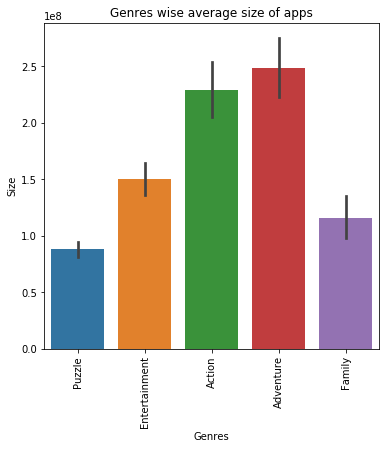

In [9]:
plt.figure(figsize=(6,6))
sns.barplot(data=game[game["Genres"].isin(top_genres)], x="Genres", y="Size")
plt.xticks(rotation=90)
plt.title("Genres wise average size of apps")
plt.show()

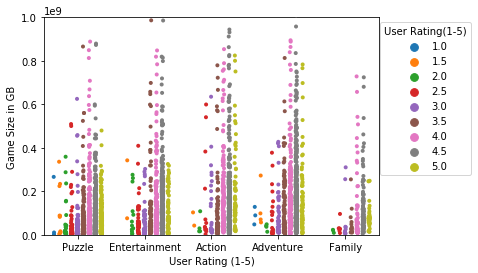

In [10]:
vis1= sns.stripplot(y='Size' , x='Genres', data=game,hue='Average_User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000000000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in GB')
plt.ioff()

### Pricing Analysis of Games

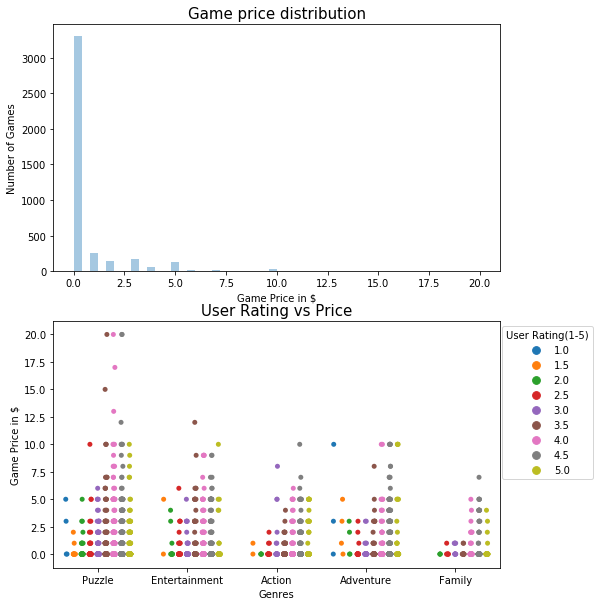

In [11]:
h, axes = plt.subplots (2,1, figsize=(8,10))

vis1 = sns.distplot(game.Price,kde=None,ax=axes[0])
vis2 = sns.stripplot(y=game.Price, x=game.Genres, data=game,ax=axes[1],hue=game.Average_User_Rating, dodge=1)

vis1.set(xlabel='Game Price in $',ylabel='Number of Games')
vis2.set(xlabel='Genres',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))

plt.ioff()

Many games are for free according to the price 

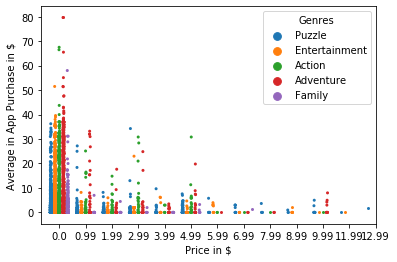

In [12]:
gamecopy=game.copy()
import statistics
gamecopy['In_App_Purchase'] = gamecopy['In_App_Purchase'].str.replace(',', '') 
gamecopy.In_App_Purchase=gamecopy.In_App_Purchase.fillna(0)

for i in (list(gamecopy.index.values)):
    if gamecopy.In_App_Purchase[i] ==0:
        gamecopy['In_App_Purchase'][i]=0.01
    elif gamecopy.In_App_Purchase[i] !=0:
        A=str.split(gamecopy.In_App_Purchase[i])
        A=[float(i) for i in A]
        gamecopy['In_App_Purchase'][i]=statistics.mean(A)
vis1= sns.stripplot(y=gamecopy.In_App_Purchase , x=gamecopy.Price, data=gamecopy, hue=gamecopy.Genres, dodge=True, size=3)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vis1.set(xlim=(-0.7, 12))
plt.ioff()

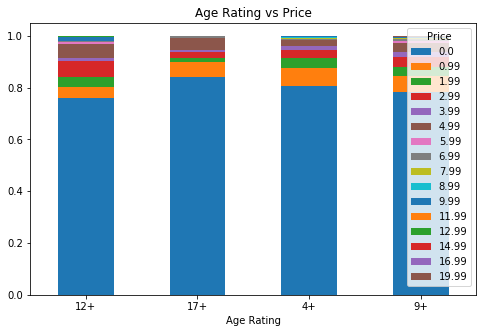

In [13]:
pricerange = pd.crosstab(gamecopy["Age Rating"], gamecopy["Price"], normalize=0)
pricerange.plot.bar(stacked=True, figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Age Rating vs Price")
plt.show()

### Annual Analysis of Games accordingly each year

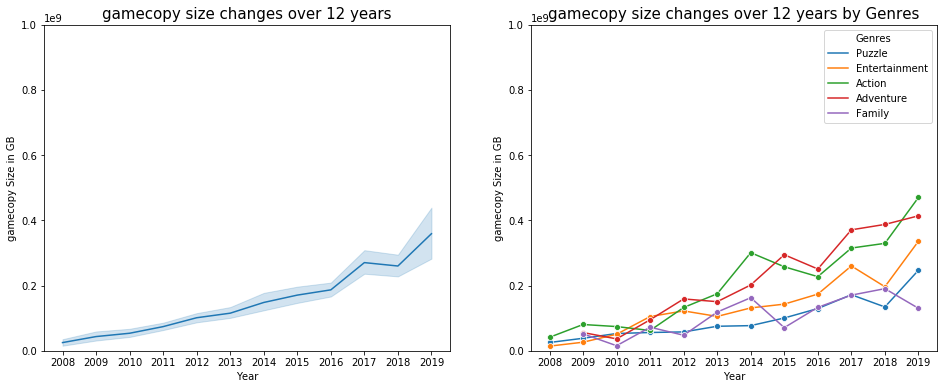

In [14]:
gamecopy['Year'] = gamecopy['Original Release Date']
gamecopy['Year'] = gamecopy['Year'].astype(str)

#extracting year for annual Analysis
for i in (list(gamecopy.index.values)):
    gamecopy['Year'][i]=gamecopy['Year'][i][:4]
    
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1 = sns.lineplot(x=gamecopy.Year, y=gamecopy.Size, data=gamecopy, ax=axes[0])
vis1.set(ylim=(0, 1000000000))
vis2 = sns.lineplot(x=gamecopy.Year, y=gamecopy.Size, hue=gamecopy.Genres, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 1000000000))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('gamecopy size changes over 12 years',fontsize=15)
axes[1].set_title('gamecopy size changes over 12 years by Genres',fontsize=15)

vis1.set(xlabel='Year',ylabel='gamecopy Size in GB')
vis2.set(xlabel='Year',ylabel='gamecopy Size in GB')

plt.ioff()

### Inference made:

* Puzzle games are used mostly than anyother game but it is the least rated game.
* Family is the highest rated game.
* Age rating 4+ has the highest proportion of apps and Age rating 17+ has the least proportion of apps.
* As age rating increases, proportion of apps decreases.
* Adventure genre is having average highest average size of apps, around 0.11 GB.
* Most of the apps available are for free.
* There is no change in the graph of price in age rating categories.
* For simpler games, focus on size between 0.1 GB to 0.15 GB of contents.
* For more complex games, target a content of 0.5 GB and above.
* Games above 1 GB have good tendancy to land above 3 score and above, provided sufficient resource available to the developer.
* Almost 90% of the developers focuses on games below 1 Dollar and places In-App Purchase as their strategy for income.
* Puzzle and Family games requires less game updates on average.
* Paid Games tend to have better reviews espeicially those above 9 Dollar scores 4.0 User Rating